In [168]:
import pandas as pd
import math
from math import *
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
import sklearn
from sklearn import datasets 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree # pour un arbre de decision
from sklearn.preprocessing import LabelEncoder ,StandardScaler

from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier as knn
from sklearn.decomposition import PCA

# Chargement des données .


In [34]:
cancer0= load_breast_cancer()
cancer= pd.DataFrame(cancer0.data,columns = cancer0.feature_names)
cancer["diagnostic"]=cancer0.target_names[cancer0.target]
cancer.shape
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


# 1. Pretraitement et exploration des données

**1.1.Pretraitement des donnees**


In [17]:
cancer.isnull().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnostic                 0
dtype: int64

**resultat** : notre jeu ne contient aucune donnée manquante.

**1.2.Exploration des données**

Ce jeu de données est constitue de 30 caracteristiques qui constituent les variables qui serviront a expliquer le diagnostic d'une tumeur   beligne ou maligne . Une tumeur beligne se developpe lentement localement et ne recidive  pas si elle est enlevée completement, contrairement à une tumeur maligne . Ces caracteristiques calculés proviennent d'une image numerisée d'une aspiration  à  l'aiguille fine d'une masse mammaire(boule dans le sein) .Ils decrivent les caracteristique des noyaux cellulaires presents dans l'image .

**objectif**
Decouvrir les correlations entre ces differentes caracteristiques ,puis trouver la relation entre ces varaibles et determiner si la tumeur est benigne ou maligne .


**1.3.Description**

In [16]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Selon la sortie descriptive ci-dessus , il ressort que la masse mammaire obtenu dans l'image a un rayon moyen de 14.1273 , un perimetre moyen de 91.96 . Par ailleurs , on remarque une compacité moyenne de 10% et en moyenne 4.8%  des points sont concaves.Toutefois , ces mesures semblent avoir ete repetees , ce qui nous permet d'avoir  les erreurs commises (ecart type) a l'issue de ces mesures. Par exemple , on constate  que l'erreur standart commises lors de la mesure du rayon de la mammaire dans cette image est de 3.52.La pire mesure du rayon est en moyenne de 16.3 .

**1.4.Exploration par Visualisation**.

- histogramme des variables 
- boxplot
- matrice de correlation.

<AxesSubplot:xlabel='diagnostic', ylabel='count'>

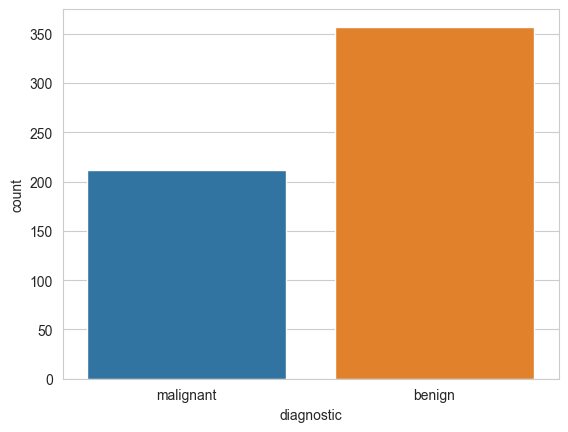

In [18]:
sns.countplot(cancer, x="diagnostic")

Au vu de histogramme , les femmes souffrent plus de tumeurs benignes  que de tumeurs malignes.

c:\users\valerie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


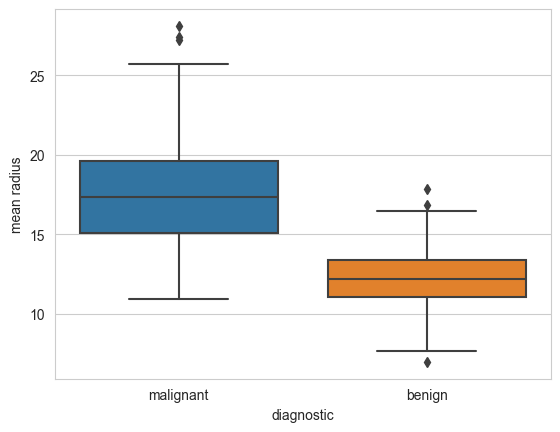

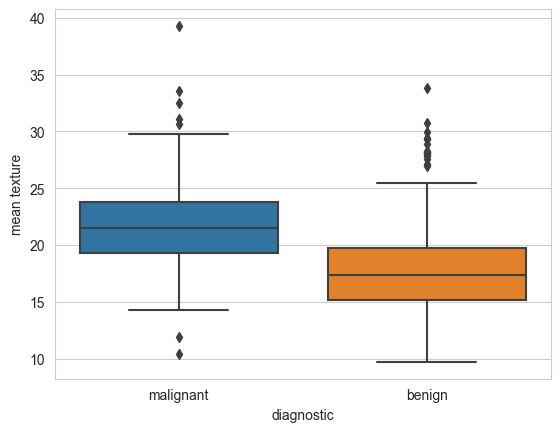

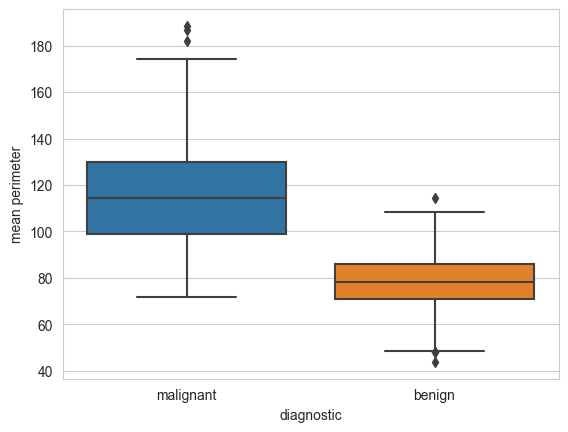

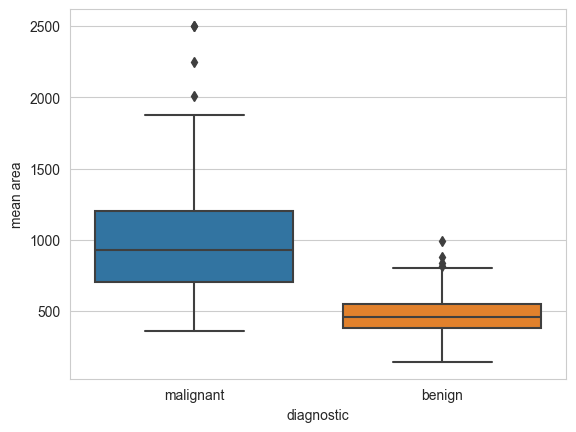

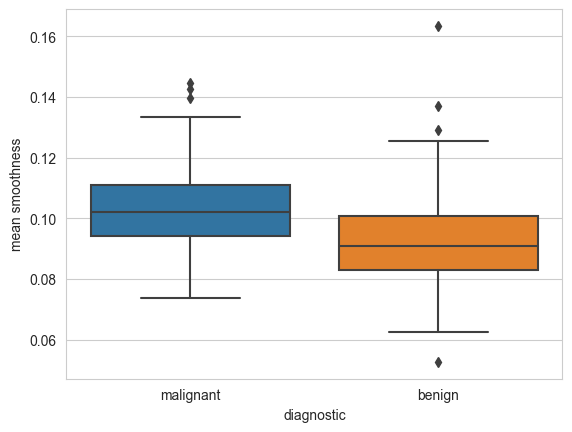

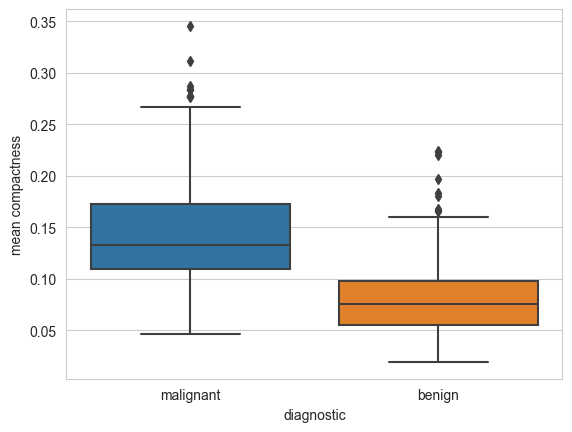

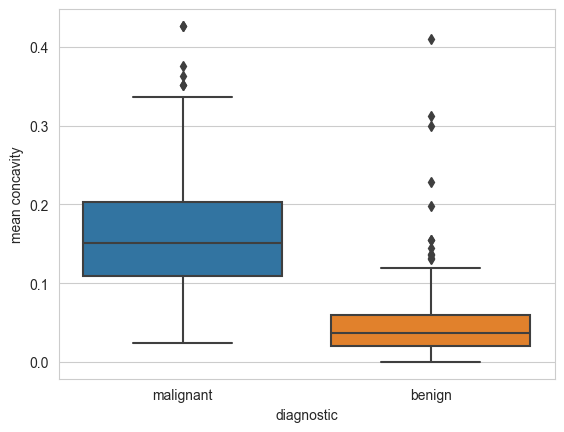

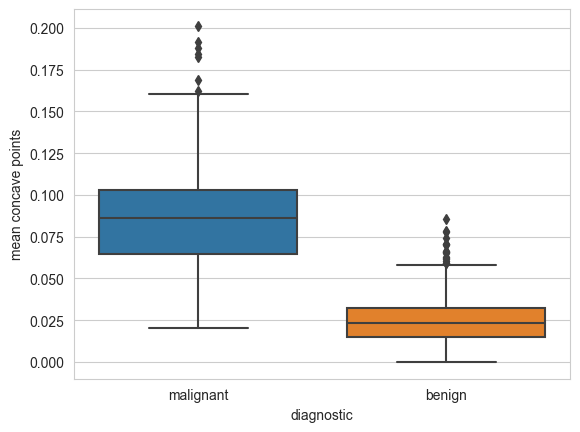

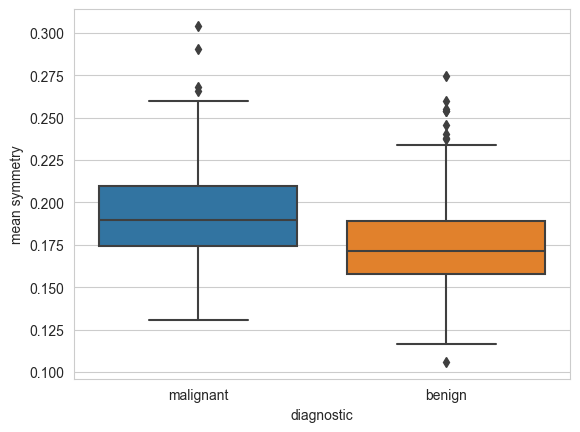

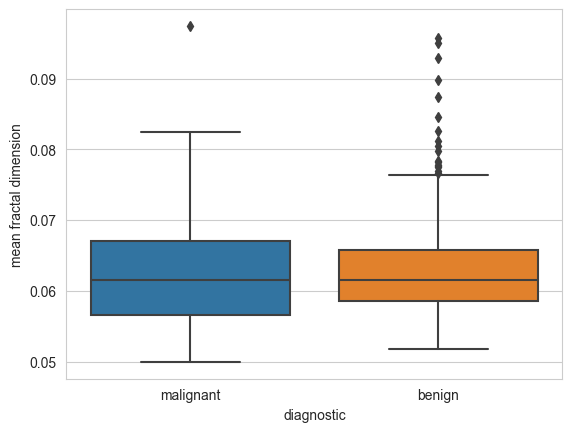

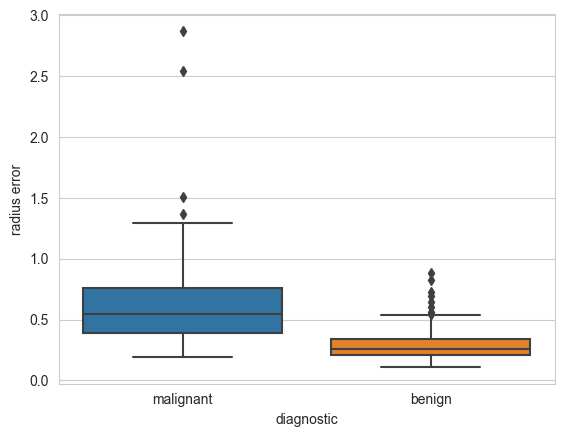

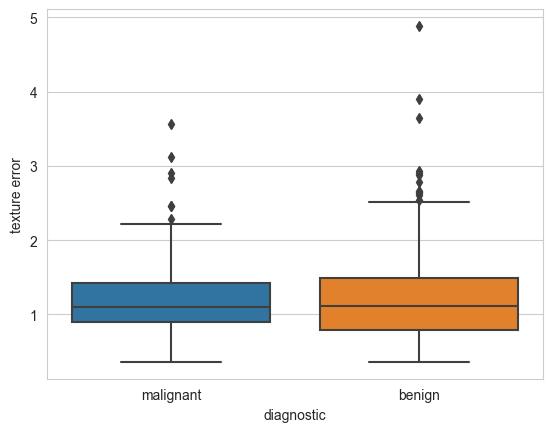

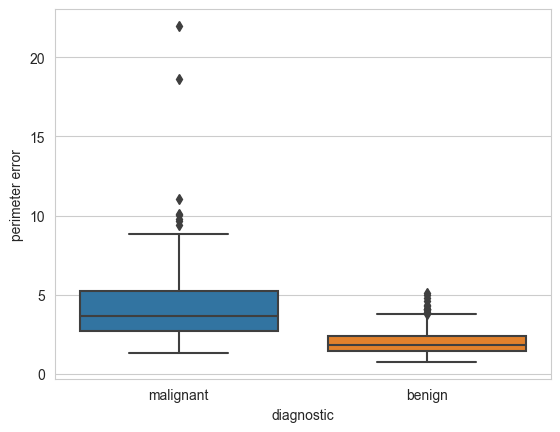

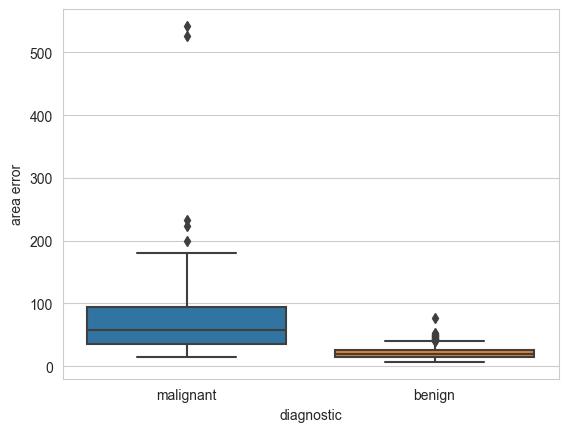

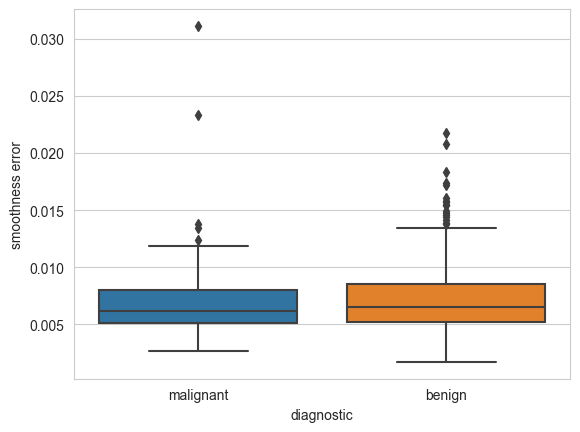

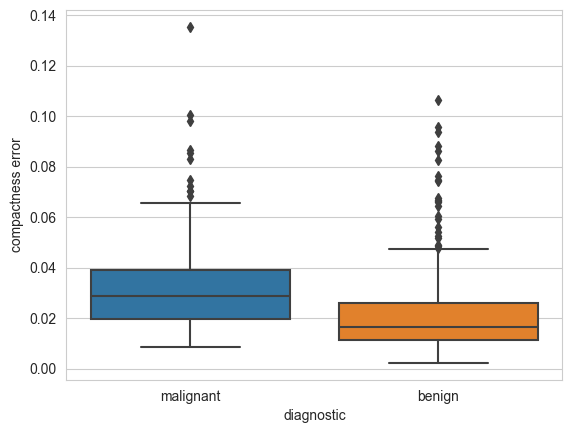

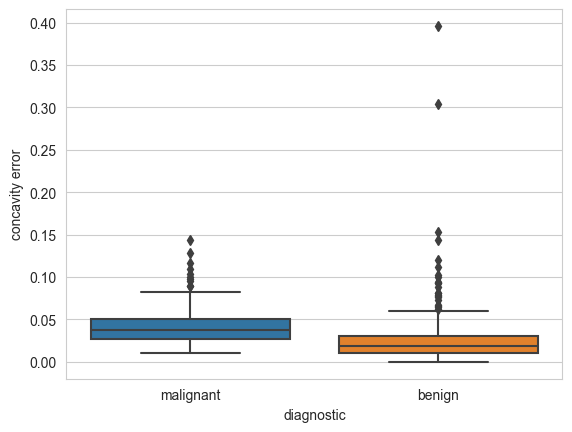

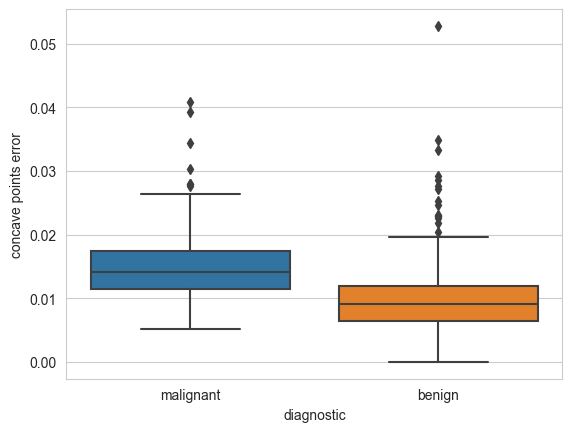

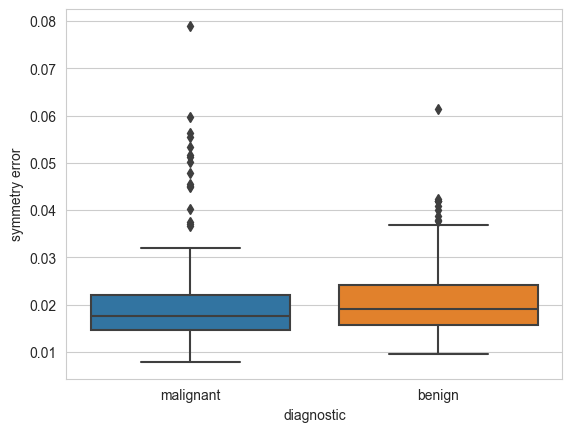

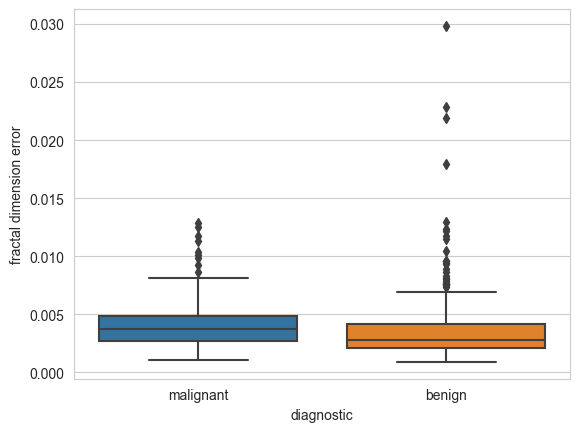

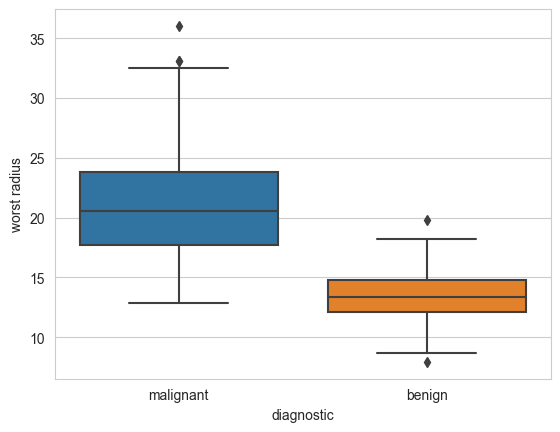

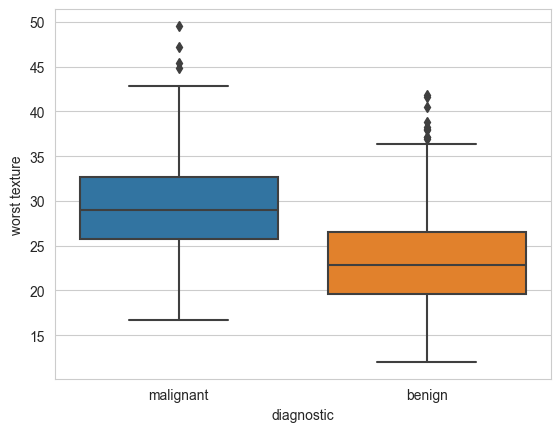

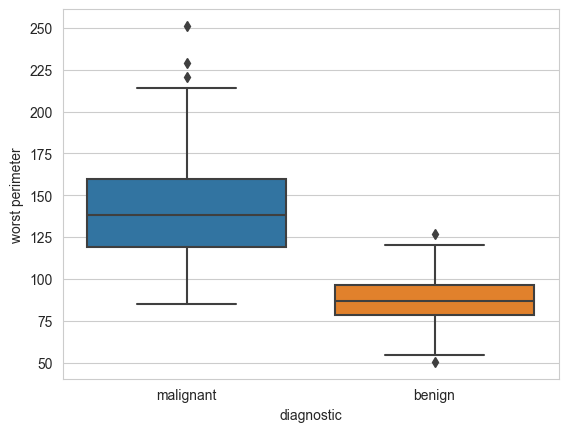

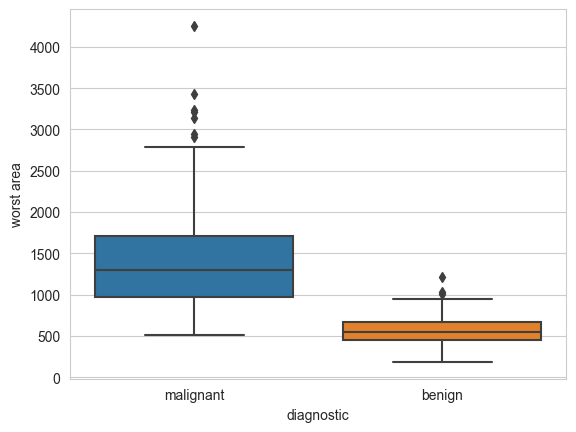

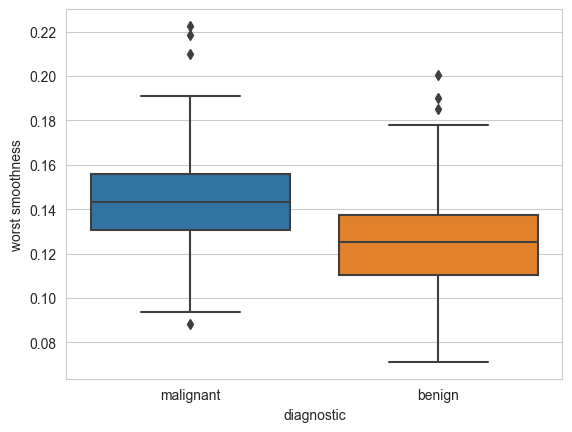

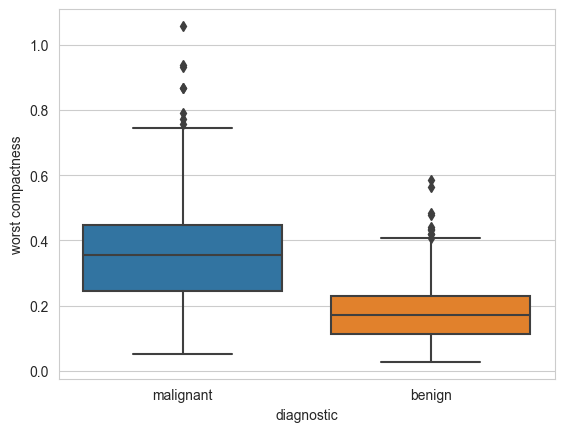

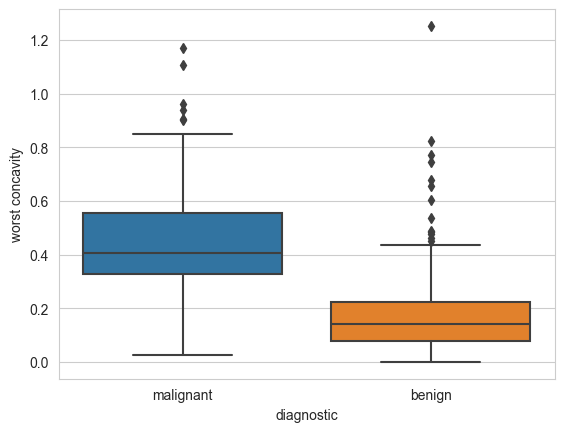

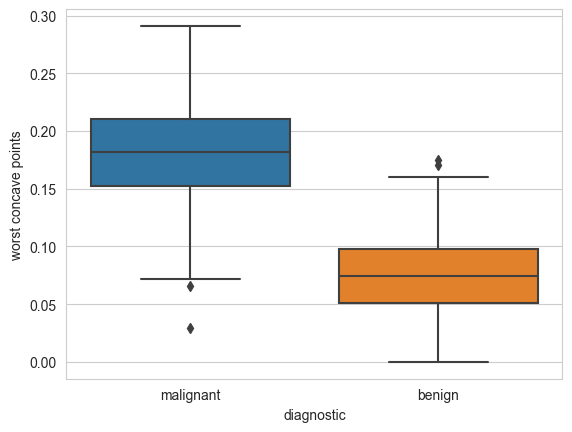

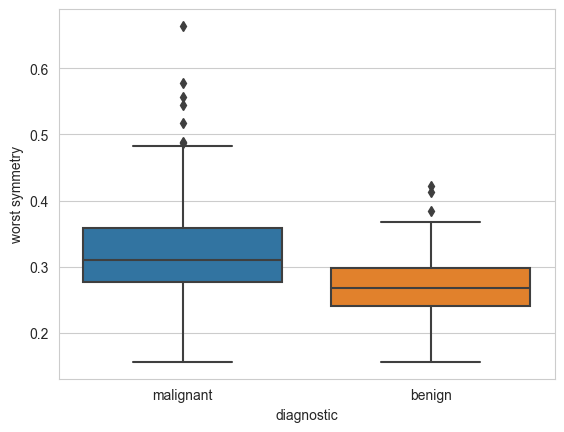

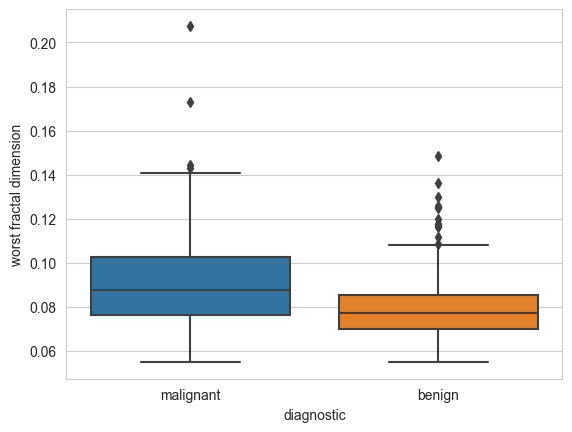

In [19]:
for i in cancer.columns[:-1]:
    plt.figure()
    sns.boxplot(x=cancer['diagnostic'],y=cancer[i])
    plt.plot()

Au vu de ces resultats ,  il semble que le perimetre moyen de la mammaire mesuré a est plus grand pour des tumeurs malignes que benignes . De meme , l'aire de la masse mammaire est en moyenne plus grand pour une tumeur maligne que benigne . cette tendance  semble etre pareil pour toutes les autres caracteristiques ,  à l'exception de l'erreur de symmetrie ,l'erreur de lissage qui semblent  légèrement plus grandes pour la tumeur benigne que maligne.

In [ ]:
#plt.figure(figsize =(10,8))
#sns.pairplot(cancer,hue="diagnostic" ,palette ="husl")
#plt.plot()


In [91]:
cancer['diagnostic'].unique()

array(['malignant', 'benign'], dtype=object)

**Modification de l'encodage :**
 
 Dans la suite nous coderons **0** un cas de **tumeur benigne** et par **1 la tumeur maligne**.

In [160]:
# variables explicatives 
X = cancer[cancer.columns[:-1]]

# Labels

enc = LabelEncoder()
Y= pd.Series(enc.fit_transform(cancer['diagnostic']))


In [153]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 2. Implementation des methodes de machine Learning

**2.1.Meilleure methode  au sens du risque 0-1 parmis toutes celles applicable aux données**

Nous sommes dans une situation de classification car nous voulons apprendre à la machine à cathegoriser si la tumeur est benigne (0) ou maligne (1) : Nous allons donc appliquer les methodes de Classifier des k plus proches voisins , et l'abre binaire de classification ,la regression logistique  et la methode lineaire de systeme vector classifier.

## criteres de comparaison

In [171]:
OutRisque={
    "RegLog":1.0,
    "knn":1.0,
    "DT":1.0,
}

OutAUC = {
    "RegLog":0.0,
    "knn" :0.0,
    "DT":0.0}

## ACP

In [161]:
acp =PCA(n_components = 5)
# centrer et reduire les variables .
X = pd.DataFrame(acp.fit_transform(X))

In [162]:
#pourcentage de la variance exppliquée par chacune des composantes  selectionnees
print(acp.singular_values_)

[15876.66588813  2037.67927678   632.27965764   176.18309541
   150.52418445]


In [164]:
# valeur de variance 

print(acp.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


La premiere composantes explique pres de 98,2% de la varibilite des axes .

In [180]:
X = cancer[cancer.columns[:-1]]

In [195]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [196]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.35,shuffle = True)

## a.1 Regression Logistique



In [197]:
# instanciation
reg =LogisticRegression()

# estimation.

reg.fit(X_train,Y_train)

c:\users\valerie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [198]:
# prediction
y_new_pred1 = reg.predict(X_test)

# Matrice de confusion

print(f"matrice de confusion ={confusion_matrix(Y_test,y_new_pred1)}")

# risque apparent

print(f"risque apparent ={1-accuracy_score(Y_test,y_new_pred1)}")


risque_rgl = 1-accuracy_score(Y_test,y_new_pred1)
OutRisque["RegLog"]= risque_rgl

#AUC
# probabilite estimées utilisées comme score(x)

probs1 =reg.predict_proba(X_test)[:,1]
probs1

OutAUC["RegLog"]=roc_auc_score(Y_test, probs1)



matrice de confusion =[[118   6]
 [  5  71]]
risque apparent =0.05500000000000005


Selon cette matrice de confusion ,  124 cas de tumeur beligne sont bien predits ,  63 cas  de tumeurs maligne son bien predits . Par contre , on a 7 cas de tumeur beligne mal predits et 6 cas de tumeur maligne mal predits.

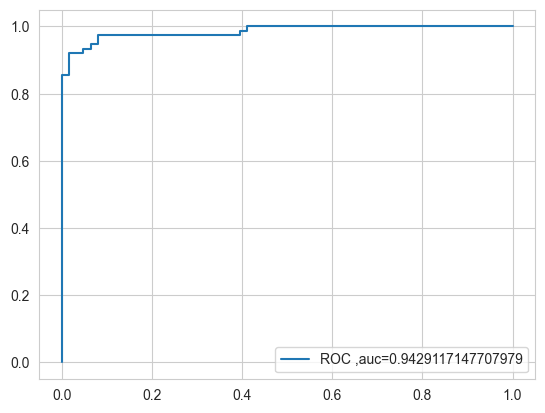

In [199]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(Y_test, probs1 , pos_label=1)
auc = roc_auc_score(Y_test,y_new_pred1 )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

On remarque que l'AUC ROC de notre modele se situe bien au dessus de celui d'un modele non-informatif et legerement en dessous de celui d'un modele parfait. Avec 94% d'AUC ROC , il s'agit d'un modele plutot tres  performant.

## a.2. KneighborsClassifier

#### selection de l'hyperparametre par validation croisée

In [200]:
def risque(k):
    knn_=knn(n_neighbors=k)
    risques =cross_val_score(knn_ ,X,Y,cv=5)
    return 1-np.mean(risques)

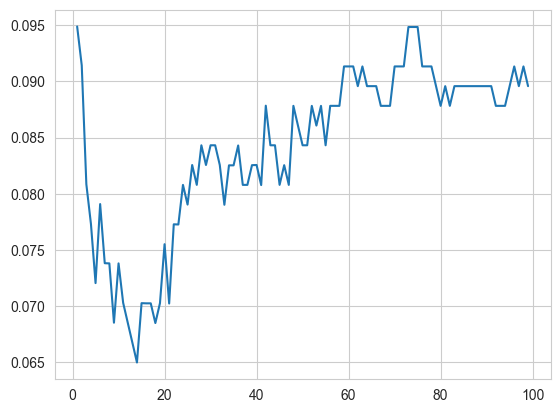

In [201]:
# valeurs candidates de k

ks =list(range(1,100))
risques =[risque(k) for k in ks]

# graphique

plt.figure()
plt.plot(ks,risques)
plt.show()

In [202]:
# k optimal

risqueMin = np.min(risques)
k_hat = np.argwhere(risques==risqueMin)[0][0]+1
OutRisque["knn"] = risqueMin

In [203]:
k_hat

14

Le meilleur classifieur des k plus proches voisin correspond à k_hat = 14

In [204]:
# instancier
clas2 =knn(n_neighbors=k_hat,metric = 'euclidean')

# estimation

fitingclass = clas2.fit(X_train ,Y_train)

# pediction 

y_new_pred2=clas2.predict(X_test)

# Matrice de confusion

print(f"matrice de confusion ={confusion_matrix(Y_test,y_new_pred2)}")



# proba estimée
probs2 =clas.predict_proba(X_test)[:,1]
probs2
# risque apparent

print(f"risque apparent ={1-accuracy_score(Y_test,y_new_pred2)}")
risque_knn =1-accuracy_score(Y_test,y_new_pred2)

OutRisque["knn"]= risque_knn


#AUC

OutAUC["knn"]=roc_auc_score(Y_test, probs2)



matrice de confusion =[[118   6]
 [  7  69]]
risque apparent =0.06499999999999995


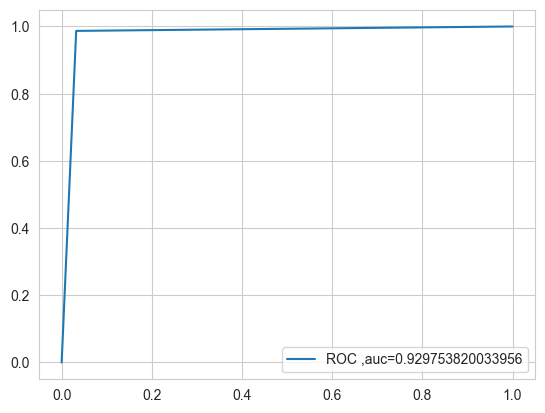

In [205]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(Y_test, probs2 )
auc = roc_auc_score(Y_test,y_new_pred2 )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

Ainsi , Avec 93% d'AUC ROC , il s'agit d'un modele plutot tres  performant.

## a.3.DecisionTrees


In [206]:
# instancier
clas =DecisionTreeClassifier()

# estimation

clas.fit(X_train ,Y_train)

# pediction 

y_new_pred3 =clas.predict(X_test)

# Matrice de confusion

print(f"matrice de confusion ={confusion_matrix(Y_test,y_new_pred3)}")

# risque apparent

print(f"risque apparent ={1-accuracy_score(Y_test,y_new_pred3)}")

risque_DT =1-accuracy_score(Y_test,y_new_pred3)

OutRisque["DT"]= risque_DT


# proba estimée
probs3 =clas.predict_proba(X_test)[:,1]
probs3

#AUC

OutAUC["DT"]=roc_auc_score(Y_test, probs3)


matrice de confusion =[[119   5]
 [  3  73]]
risque apparent =0.040000000000000036


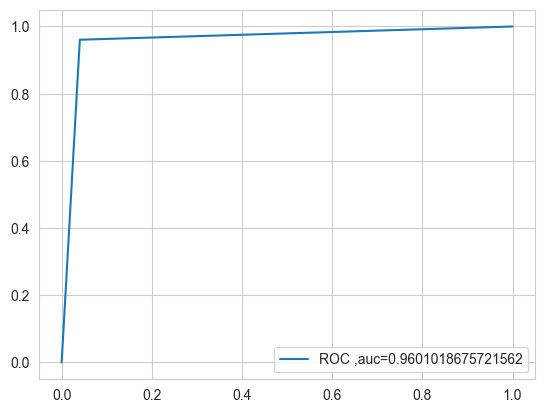

In [207]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(Y_test, probs3 )
auc = roc_auc_score(Y_test,y_new_pred3 )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

In [208]:
OutRisque

{'RegLog': 0.05500000000000005,
 'knn': 0.06499999999999995,
 'DT': 0.040000000000000036}

In [209]:
OutAUC

{'RegLog': 0.9847198641765704,
 'knn': 0.9772920203735145,
 'DT': 0.9601018675721562}

Au vu de ces sorties , on constate le plus petit risque appparent vient de la methode des Decision trees, avec le deuxieme plus grand AUC.Par ailleurs , la methode de Decision treesa mieux predit les tumeurs begnine que la methode de regression Logistique . Donc pour ce probleme , la meilleur methode est la methode Decision trees .

# 3. Caracteristiques de tumeur les plus importantes .

Au vu de de l'ACP , on peu dire que les caracteristique les plus importantes sont le Mean radius et eventuellement 